<a href="https://colab.research.google.com/github/MWSteams/4590FSP/blob/master/Sedimentation_Hydraulic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sedimentation Hydraulic

Claudia Buchard, Emma Payne, Kevin Sarmiento

[/Monroe/]: # (Excellent! Great job bringing in the relevant equations. The AguaClara team has attempted to operate sedimentation tanks at higher upflow velocities and it is at least possible to operate at higher velocities than the 1 mm/s that AguaClara has used. Kevin has the perfect apparatus for testing this once we have permission to begin research again! Fortunately you can create designs that will respond correctly to changes in the upflow velocity and thus you can make it easy for the client to see what the designs would be for a range of upflow velocities.) 


In [0]:
!pip install aguaclara
!pip install molmass

In [0]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import molmass as mol
!wget https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
import Fairmont as fmt

--2020-04-28 23:10:18--  https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2538 (2.5K) [text/plain]
Saving to: ‘Fairmont.py.1’

Fairmont.py.1       100%[===================>]   2.48K  --.-KB/s    in 0s      

2020-04-28 23:10:19 (49.6 MB/s) - ‘Fairmont.py.1’ saved [2538/2538]



# Task Definition

[/Monroe/]: # (Good task definition)

The overall project has three main goals: 

1. To improve the source water quality of the LAAFP and lighten the burden on its filters by building a sedimentation plant upstream, 
2. To eliminate the need to operate the Cottonwood Treatment Plant and 
3. To mitigate the risk associated with arsenic sediment build up in the North Haiwee Reservoir. 

The goal of our team’s project is to design a sedimentation system with a floc blanket that can treat arsenic, TOC, and turbidity to allowable limits while maintaining high efficiency and minimizing space requirements at the treatment plant. This sedimentation system must be able to treat a design flow of 720 CFS and operate efficiently under a variety of turbidity, arsenic, TOC and emerging contaminant conditions. To complete this task we will need to decide on a set of design variables such as plan view area of the sedimentation tank, the geometry of the tank, upflow velocity, number of treatment trains, depth of the floc blanket, the physics of the diffusers in the resuspension system and the height of the floc hopper, as well as constraints for the plate settlers. With these variables decided we must then confirm that the flocculation-sedimentation system can treat the contaminants to allowable limits for various flow and concentration conditions.

# Executive Summary 

Highlight dominant constraints and your recommendation for the design.


The sedimentation tank must be able to process a design flow of 720 CFS to be sent to the LAAFP. The estimated influent water quality of 55 μg/L of arsenic, 4 mg/L of TOC, and 23 NTU of turbidity must be reduced to 10 μg/L, 3mg/L, and 3 NTU in order to meet the client standards. The proposed plan view area for the sedimentation tanks is 250' X 510', making maximum upflow velocity of the system 1.7 mm/s, and the surface loading rate is 0.5 gpm/ft^2. However, these values may be altered to create a better functioning system. The overall sedimentation tanks must be easily accessible for operations and maintenance, so must have adequate platforms and walkways for visibility. 

[/Monroe/]: # (What else could you add as high level summary? How about something about reducing the number of moving parts, improving the performance of the sedimentation tanks with a floc blanket, and ... ?)

[/Monroe/]: # (Define what is meant by surface loading rate and show that number in mm/s as well. Good work doing some design calculations, but why didn't you use python to calculate these values? Goal is to get to the place where you default to python as your calculator of choice!)



# Constraints


Constraint information taken from [Fairmont Sedimentation Plant Scope of Work Document](file:///C:/Users/Claudia/Downloads/Fairmont%20Sedimentation%20Plant%20Scope%20of%20Work%20_FINAL%2006-01-17.pdf) and [AguaClara Textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Derivations.html#floc-blanket-design)
* Relevant regulations

>>Permits required found in section X of document


* client expectations

>>Fairmont WTP will pre-treat incoming waters from LAA1, LAA2, and SWP-E then send them to the LAAFP for final treatment. 

>>Must eliminate the need for the Cottonwood Treatment Plant, thus preventing arsenic sedimentation in the North Haiwee Reservoir.

>> Must be capable of treating 720 cfs

>>Treatment standards: 

| Contaminant | Design Influent Water Quality  | Fairmont Sedimentation Plant Settled Water Goal | 
|---|---|---|
| Arsenic (μg/L) | 55 | 10 |
| TOC (mg/L)| 4 | 3 |
|Turbidity (NTU) | 23 | 3 |


* Site

>>Water system-owned Fairmont Reservoir property

>>Ave H and 170th street, Lancaster, CA

>>Zone A-2-2, heavy agricultural

>>250’ x 510’ proposed area for sedimentation- may want to break this constraint and use a larger area to use a smaller upflow velocity


* budget

>>Estimated to cost $220 million for the whole project

* process capabilities including process design equations

>>See **Physics** section


* ease of use 

>>Adequate floc hopper height for easy sludge removal

* operation requirements

>>ferric chloride and a cationic polymer in flocculation

>>Follows rapid mix and flocculation

>>Estimated 416 hrs/year of treatment operations

[/Monroe/]: # (Where does this number come from and what does it mean? Is this plant really only going to operate for a couple of weeks per year???)


* maintainence requirements

>>Walkways and platforms for easier maintenance and operation, open top for visibility

>>Estimated 288 hrs/year of maintenance and construction hours

* geometry/size requirements

>>Surface loading rate for plate settlers- 0.5 gpm/ft^2, 0.339 mm/s 

>>Surface loading rate for AguaClara: 0.12mm/s

>>60 degree angle for sedimentation tank

>>Sedimentation tank 7m X 1m for AguaClara

>>1/8th-¼ of an inch diffuser width minimum to make sure all particles can pass through

>>Roughly less than 1cm of headless through diffusers

>>1.7 mm/s upflow velocity if we use their plan view area, may want to use 1 mm/s instead to make it comparable to AguaClara sedimentation tanks


# Physics

Our goal is to design a sedimentation tank for the LAAWTP with many of the features of an AguaClara sedimentation tank. This would include a floc blanket and the bottom geometry used in current AguaClara sedimentation tanks. However, due to the large flow rate required for this plant a few features will be modified to be more efficient with space. We are looking to increase the overall size of each sedimentation unit from the AguaClara standard of 7 meters length and 1 meter width. To do this we will design a sedimentation tank with multiple influent manifolds and jet reversers. We will optimize the overall size and number of manifolds and reversers to reduce the overall footprint and material use. 

## Manifolds and diffusers 
One of the important things we need to design are the inlet manifolds and diffusers. The following are relevant equations that we will use for the design. 

Equation 645 in [AguaClara textbook](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html?highlight=manifold#equation-sed-diffuser-jet-velocity) is used to calculate the width of a diffuser based on the design upflow velocity and sedimentation tank dimensions.

$$W_{diffuser} = \frac{V_{floc Blanket} W_{Sed} B_{Diffuser}}{V_{Jet} S_{Diffuser}} $$

The velocity of the jet from the diffuser is determined from the desired head loss. This is important because the greater the head loss at the diffusers the more uniform the flow throughout the entire length of the manifold that feeds the diffusers. 

Headloss from diffusers: 
$$H_{L\space Diffuser}= \frac{V_{Jet}^2}{2g}$$

The following equation is the ratio between port velocity and manifold velocity from [AguaClara textbook](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html?highlight=manifold#equation-manifold-max-v-no-hl-series). This is an important design equation because it ensures that we have as uniform flow as possible. Keeping flow uniform helps prevent undesired circulations in the sedimentation tank which can lead to decreased performance. Additionally, this equation will be important when designing the piping between sedimentation basins. We would want to ensure even distribution between each sedimentation units.

$$\frac{\bar v_{P}}{\bar v_{M_1}} = \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}$$

Where $\Pi_{Q}$ is the ratio of flow between the first and last oriface in the manifold which we like to keep at around a value of 0.85. 

$$\Pi_{Q} = \frac{Q_{Diffuser \space 1 }}{Q_{Diffuser \space n }}$$



##plate settlers
Plate settlers are important for verticle flow sedimentation tanks because they allow for greater removal efficiencies compared to vertical flow sedimentation tanks without them. The following equation is for finding length of plate settlers [AguaClara Textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Derivations.html#equation-sedimentation-sed-derivations-8) based on design parameters described below.

$$L = \frac{S\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}-1\right) + T\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}\right)}{sin\alpha cos\alpha}$$
where:
- $S$ is spacing between plates
- $T$ is the thickness of the plates
- $v_{up}$ is the upflow velocity
- $v_c$ is the capture velocity
- $\alpha$ is the angle of the plate settlers

For most of these variables we will be using the same constants that have been used in previous AguaClara plants. Some of these constants are not yet optimized and therefore require further research into how they affect overall plant performance. 

## particle sedimentation 
To find the terminal velocity of single particles in the sedimentation tank and plate settlers we can use the following equation if the flow regime is laminar. Retrieved from [AguaClara textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Intro.html#equation-sedimentation-sed-intro-3)

$$ V_t = \frac{gD^2}{18\nu}\frac{\rho_{floc} - \rho_{H_2O}}{\rho_{H_2O}}$$

If flow is turbulent the the terminal velocity equation will be as follows: 
$$v_t = \sqrt{\frac{4}{3}\frac{gD}{C_D}\frac{(\rho_{floc}-\rho_{H_2O})}{\rho_{H_2O}}} $$ 
where $ C_D = \frac{24}{Re}(1+0.150Re^{0.681})+\frac{0.407}{1+ \frac{8710}{Re}} $

### Floc sedimentation 
To find the terminal velocity of flocs which are agrigates of primary particles we use the following equation: 
$$ v_t = \frac{D_0^2g}{18\Phi\nu}\frac{\rho_{floc_0} -\rho_{H_2O}}{\rho_{H_2O}} \left( \frac{D}{D_0} \right) ^{D_{fractal}-1} $$ Retrieved from eq. 405 in the [AguaClara Textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Intro.html#equation-sedimentation-sed-intro-6)

With this we can get an approximation of the smallest size floc that our sedimentation tank can capture. 

##Tank Geometry
We will using trigonometry to optimize the bottom geometry of the sedimentation tank. 

## Floc hopper 

The development of a model for sludge accumulation in the floc hopper would be useful. This would help us make decisions about the size and storage capacity that we should plan for in the floc hopper. Additionally, it would be informative for the operators to know how often to purge the floc hopper of sludge. 

# Table listing potential strategies to meet the constraints and treatment objectives


| strategy | advantages  | disadvantages | data needed for decision |
|---|---|---|---|
| Experience + physics | high potential for success | requires knowledge | lots |
| Playing with geometry| Can lead to simple and elegant designs | Requires a lot of imagination | Clear constraints|

# Vendors and contact information file

See this [tab delimited spreadsheet](https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt).

Add rows to the vendor spreadsheet as you find them. The sheet can easily be edited in Excel. Just make sure to save it as a tab delimited sheet. Push your changes to github so the entire class has access to the document.



In [0]:
vendors = pd.read_csv('https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt',sep='\t')
vendors

,item description,vendor,contact first name,contact last name,vendor website,product info,date of contact,who made the contact,notes
0,plate settlers,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/literaturemedia/...,4/16/2020,Ian Cullings,NaN
1,sludge removal system,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/products/hoseles...,4/16/2020,Ian Cullings,NaN
2,plate settlers,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,https://www.monroeenvironmental.com/water-and-...,4/16/2020,Ian Cullings,NaN
3,sludge removal system,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,http://www.monroeenvironmental.com/water-and-w...,4/16/2020,Ian Cullings,NaN
4,plate settler with hopper,Parkson,still,pending,https://www.parkson.com/,https://www.parkson.com/products/lamella-ecoflow,4/16/2020,Ian Cullings,Includes sloped sludge hopper in design
5,rapid mixer (mech),Dynamix,still,pending,https://www.dynamixinc.com,https://www.dynamixinc.com/industries/waste-wa...,4/16/2020,Lynn Li,NaN
6,rapid mixer (mech),Meurer Research,still,pending,http://www.meurerresearch.com,http://www.meurerresearch.com/products/mixer/,4/16/2020,Lynn Li,NaN
7,rapid mixer (mech),Philadelphia Mixing Solutions,still,pending,https://www.philamixers.com,https://www.philamixers.com/industries/water-w...,4/16/20,Lynn Li,NaN


# Shared assumptions

See this [python file, Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py)

Use this file to hold parameters that are in the SOW or elsewhere that
influence the design of the entire plant. This provides an easy mechanism
for all of us to share the same assumptions. Read the SOW to find sections that relate to your part of the design and enter all pertinent variables into [Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py) and then push those changes to github.

# Major Decisions

Write several paragraphs describing the major decisions that you will need to make in order to create a design and outline a strategy for how you will obtain the necessary information to make those decisions.

# Next Steps and Challenges

Summarize the next steps that you will be taking to move the design forward. Identify any challenges where you may need assistance.

# Design

Begin writing the code to start your design. Define flow rates, mass rates, energy requirements, and any readily calculated dimensions, velocities, flows, etc.

In [0]:
print('The average flow to be treated at Fairmont is',fmt.q_ave.to(u.Mgal/u.day),'or')
print('The maximum flow to be treated at Fairmont is',fmt.q_max.to(u.Mgal/u.day))
specific_energy = (fmt.electricity_power/fmt.q_ave).to(u.J/u.L)
temp = 15 * u.degC
specific_potential_energy = (specific_energy / u.gravity / ac.density_water(temp)).to(u.m)
print('The average amount of energy used per liter of water is expected to be',specific_energy,'or',specific_potential_energy,'of potential energy')

The average flow to be treated at Fairmont is 206.8 megagallon / day or
The maximum flow to be treated at Fairmont is 465.3 megagallon / day
The average amount of energy used per liter of water is expected to be 118.1 joule / liter or 12.05 meter of potential energy


In choosing the number of sedimentation units and their size it is important to consider a few constrains. If a plant has many smaller sedimentation units then it would be combersome and inefficient to run them all. However, having smaller units allows operators to more precisly control the upflow velocities in the active sedimentation tanks if the total water demand increases or drops. At the other end of the spectrum, if there is a small number of very large sedimentation units then it would be easier for operators to control those few units. However, if there is a need to take one unit offline then the total production decreases at a higher percent of the total flow than with smaller units. Somewhere in between is the "ideal". Based on this notion, we propose the Fairmont Sedimentation Plant use 8 sedimentation units. To find the dimensions of each unit we must define the maximum operating upflow velocity in the sedimentation units. 

The sedimentation tanks that we are designing are vertical upflow sed tanks that will have a fluidized/suspended bed of flocs in what we call a floc blanket. The upward velocity in the sedimentation tanks will impact whether or not a floc blanket can be formed. If the upflow velocity is too high then only the very large flocs will be captured by the plate settlers, no floc blanket will form, and plant performance will drop below desired. AguaClara designs sedimentation tanks with floc blankets and upflow velocities of 1 mm/s. This design has proven to be very effective at producing effluent turbidities below 1 NTU. Given the design max flow rate of this plant and the space constrictions a higher upflow velocity is considered for sedimentation. In 2015, Casey Garland, a Ph.D. student working on floc blanket research carried out experiments to test if higher Energy Dissipation Rates(EDR) at the injection site of the sedimentation tank affected performance. She carried these lab scale tests out at 1.2 mm/s and 1.6 mm/s upflow velocities with great performance. This is promising because it allows us to increase the maximum upflow velocity from 1mm/s to 1.6 mm/s at the Fairmont plant. 

Based on the maximum upflow velocity, maximum design flow rate of 720 cubic feet per second, and the number of units we want (8) we calculated each unit would be 40 meters long by 39.8 meters wide. It would perhaps be alright to round the dimensions out to 40 x 40 meters to make the tanks uniform. The total active sedimentation area required for all 8 units is 12,800 square meters. While this is more area than what the Scope of Work alocated for the sedimentation units, 11,850 square meters, we believe it is still feasible. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/FSP_sed_tank_top_view_1.0.JPG" height=400>
</p>
<p align="center">

**Figure 1:** A bird's-eye view of the proposed sedimentation unit with floc hopper channel visible and preliminary dimensions

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/FSP_sed_tank_side_view_1.0.JPG" height=250>
</p>
<p align="center">

**Figure 2:** A side view of the proposed sedimentation unit with floc hopper channel visible and bottom geometry

The following code illustrates how the dimensions of the tank were calculated. It also shows that this preliminary design is feasable in a number of ways. The first thing we wanted to check was the range of flow rates that this plant could operate in. We are designing the plant so that it could meet all the treatment goals at maximum capacity. However, the plant will operate at a range of different flow rates. To predict if this would be an issue we created code that allowed us to easily find the upflow velocities at different flow rates with different number of sedimentation units online. 

We saw that when the plant is operating at its average flow rate of 9.06 cubic meters per second and all sed units are in operation the resulting upflow velocity is 0.71mm/s. There is no evidence suggesting a floc blanket could not form at this slower velocity. However, we were concerned that the reduced flow rate in each tank would make it more difficult for the jet reverser to resuspend settling flocs and as a result begin to fill with sludge. This would be a failure mode and we want to avoid this. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/screenshot_jet_reverser_Garland_2015.JPG" height=250>
</p>
<p align="center"> 

**[(Garland, 2015)](https://www.researchgate.net/publication/287358758_Influence_of_Variable_Inlet_Jet_Velocity_on_Failure_Modes_of_a_Floc_Blanket_in_a_Water_Treatment_Process_Train)**

Casey Garland examined this failure mode in her Ph.D thesis and concluded that in order to prevent flocs from filling up the jet reverses an Energy Dissipation Rate (EDR) above ~1 mW/kg was desired. 

$$\epsilon_{Jet} = \frac{(\Pi_{Jet}V_{Jet})^3}{D_{Jet}} $$

**[(Garland, 2015)](https://www.researchgate.net/publication/287358758_Influence_of_Variable_Inlet_Jet_Velocity_on_Failure_Modes_of_a_Floc_Blanket_in_a_Water_Treatment_Process_Train)**



<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/jet_reverser_Garland_2015.JPG" height=300>
</p>
<p align="center">

We will use this as a design constraint as we move towards the design of the diffusers and jet reversers. 

In [0]:
# calculations for finding size of sedimentation unit based on the number sed 
# units desired for the entire plant 

max_V_up = 1.6*u.mm/u.s
length_sed_unit = 40*u.m
max_num_sed_units = 8
width_sed_unit = fmt.q_max / (max_V_up * length_sed_unit *max_num_sed_units)
print('Based on limiting parameters the sedimentation tank dimensions are: Length-' +str(length_sed_unit.to(u.m)) +
      ' and width-'+ str(width_sed_unit.to(u.m)) )

area_sed_tanks = (length_sed_unit * width_sed_unit * max_num_sed_units).to(u.m**2)
planned_area_fairmont = (250 * 510 *u.feet**2).to(u.meter**2) # From Scope of Work 
print ('Total active area for hydraulic sed tank design is '+str(area_sed_tanks) + ' while the planned are was '+str(planned_area_fairmont))

Q_max_sed_hydraulic_unit = (1.6*u.mm/u.s * length_sed_unit * width_sed_unit).to(u.megagallon/u.day)
print('Each sedimentation unit can treat up to '+str(Q_max_sed_hydraulic_unit))

# This function calculates the upflow velocity of all the sedimentation basins 
# that are online based on plant total flow rate and the number of sedimentation
# units online at that moment. This is useful because we would want to ensure that 
# we can meet peak and average demand and do it while staying between a min and max 
# upflow velocity. 

def upflow_velo_sed(Q ,num_sed_units, length_sed_unit,width_sed_unit ):
  return (Q / ( num_sed_units *length_sed_unit * width_sed_unit)).to(u.mm/u.s)

num_sed_units = 8 # This value can be changed to see how removing sed units affects upflow velo in the other tanks and the EDR at the jet reverser 
Q_example = fmt.q_ave.to(u.m**3/u.s)
V_up_sed = upflow_velo_sed( Q_example, num_sed_units, length_sed_unit , width_sed_unit)
print ('When the plant flow rate is '+str(Q_example) +' and '+str (num_sed_units)+
       ' out of '+str(max_num_sed_units)+ 
       ' sedimentation tanks are online, then the upflow velocity in those tanks is ' +str(V_up_sed))


# Jet reverser Energy Dissipation Rate
# Perhaps this could be used as a constraint. 
# if EDR gets too low, we can have issues resuspending flocs and an accumulation of 
# sludge can occur at the bottom of the tank 
# Garland et al show good performace at every EDR except 0.25 mW/kg due to the jet reverser 
# becoming filled. The next EDR sucessfully tested was ~1mW/kg. This will be set as the minumum for our design

# function to calculate the EDR from a jet reverser: from Garland 2015 
def EDR_jet(pi_jet , upflow_velo_sed , width_jet, width_section):
  V_jet = width_section * upflow_velo_sed / width_jet  # velocity of the reversed jet  
  return ((pi_jet*V_jet)**3 / width_jet).to(u.milliwatt/u.kg)

pi_jet_circular = 0.5
pi_jet_plane = 0.23 # from Garland 2015 
width_jet = 10*u.mm # this is determined by the diameter or width of the diffuser oriface which we can change
width_section = 1.5*u.meter # spaceing between jet reversers is adjustable: traditional AC plants it is 1 meter
EDR_sed_unit = EDR_jet(pi_jet_plane , V_up_sed , width_jet, width_section)

print ('For a sed tank with upflow velo of '+str(V_up_sed)+' sectional width of '+ 
       str(width_section)+' and jet width of '+str(width_jet)+' the EDR is '+str(EDR_sed_unit))

Based on limiting parameters the sedimentation tank dimensions are: Length-40 meter and width-39.82 meter
Total active area for hydraulic sed tank design is 1.274e+04 meter ** 2 while the planned are was 1.185e+04 meter ** 2
Each sedimentation unit can treat up to 58.17 megagallon / day
When the plant flow rate is 9.061 meter ** 3 / second and 8 out of 8 sedimentation tanks are online, then the upflow velocity in those tanks is 0.7111 millimeter / second
For a sed tank with upflow velo of 0.7111 millimeter / second sectional width of 1.5 meter and jet width of 10 millimeter the EDR is 1.477 milliwatt / kilogram


## Size of Manifolds


As a reality check we will be calculating the diameter of the manifolds that supply water to the sedimentation tanks. Traditional AguaClara plants are about 6 meters long but our proposed sedimentation tanks are 40 meters long. This means that each trunk of a sedimentation manifold must supply a much larger quantitiy of water and therefore will have a larger diameter. If those diameters get too large they can take up a large fraction of the sedimentation unit itself and that could become a failure mode. 

This analysis begins with the following equation which describes the ratio between the velocity leaving the ports, $\bar v_{P}$ , and the velocity in the manifold, $\bar v_{M_{1}}$ . This equation assumes that the head loss due to friction in the pipe is small. 

$$\frac{\bar v_{Jet}}{\bar v_{M_1}} = \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}$$
From [AguaClara Textbook Equation 643](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html#equation-manifold-max-v-no-hl-series)

Where $ \Pi = \frac{Q_{port \space 1}}{Q_{port \space n}} $ which describes the ratio of flow between the first and last ports on the manifold. AguaClara typically uses 0.85 in their designs and that has shown great results. 

The velocity of the flow out of the diffuser will be set by the desired upflow velocity in the sedimentation tank($\bar v_{FB}$), the width of the section which the manifold supplies water to ($ W_{Sed}$), and the width of the diffusers ($W_{Diffuser}$).

<p align="center">
  <img src="https://aguaclara.github.io/Textbook/_images/BvsS_diffuser.png" height=150>
</p>
<p align="center">


$$\bar v_{Jet}  = \frac{\bar v_{FB} W_{Sed} B_{Diffuser}}{W_{Diffuser} S_{Diffuser}}$$
from [AguaClara Textbook Equation 645](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html#equation-sed-diffuser-jet-velocity) 

If the thickness of the diffuser wall is small then we can simplify the equation to: 

$$\bar v_{Jet}  = \frac{\bar v_{FB} W_{Sed} }{W_{Diffuser} }$$
and now solve for the velocity in the manifold as a function of velocity of the jet and the ratio of flows shown above: 

$$v_{Manifold} = \frac {v_{Jet}}{(\frac{v_{Jet}}{v_{Manifold}})}$$


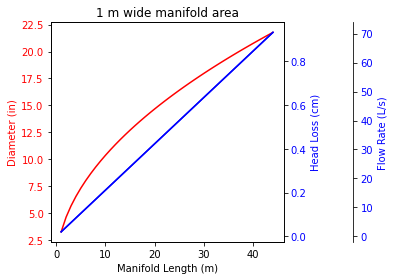

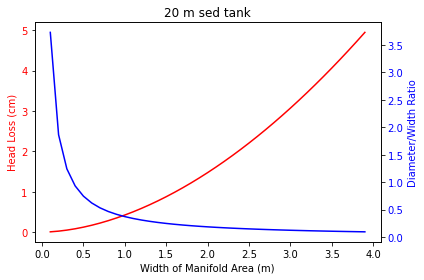

Diameter manifold in AC plant is 8.042 inch, flow rate of 6.42 liter / second, manifold to sed tank width ratio 0.1909 dimensionless and headloss of 0.1758 centimeter
Diameter manifold in FSP plant is 14.68 inch, flow rate of 32 liter / second, manifold to sed tank width ratio 0.3729 dimensionless and headloss of 0.4345 centimeter
Minimum diameter for pipe with 0.1758 centimeter of head loss is 10.5 inch
Minimum diameter for pipe with 0.4345 centimeter of head loss is 19.29 inch


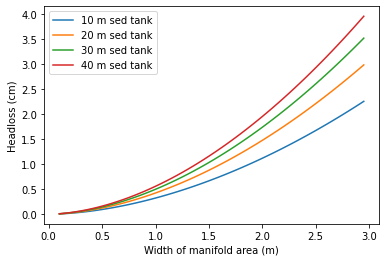

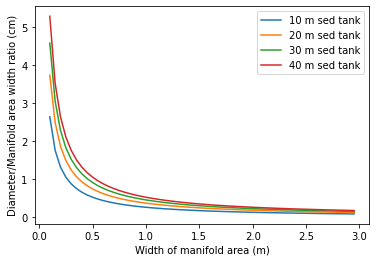

In [0]:
def Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow):
  return np.sqrt((Ratio_flow**2 + 1)/(2*(1-Ratio_flow**2)))

def manifold(W_Diffuser , v_up , width_section_eq , length_sed , Ratio_flow):
  v_jet = v_up * width_section_eq / W_Diffuser
  v_Influent_Manifold = v_jet / Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow)
  Q_section =(length_sed * width_section_eq * v_up).to(u.L/u.s)
  ID_min_Influent_Manifold = ac.diam_circle(Q_section/v_Influent_Manifold)
  return ID_min_Influent_Manifold.to(u.inch) , Q_section 


Nu = ac.viscosity_kinematic_water(temp)
max_V = 1.6*u.mm/u.s
length_sed_unit_FSP = 20*u.m 
width_section = 1*u.m

Ratio_flow = 0.85
W_Diffuser = 3.1 * u.mm # This is the width of traditional AC plant's diffusers 
v_FB = 1 * u.mm/u.s
W_Sed_AC = 1.07 * u.m
L_Sed = 6*u.m
Roughness = 0.002*u.mm 
KMinor_manifold = 2 

manifold_FSP = manifold(W_Diffuser , max_V , width_section , length_sed_unit_FSP  , Ratio_flow)
manifold_AC = manifold(W_Diffuser , v_FB , W_Sed_AC , L_Sed  , Ratio_flow)


## to test feasability I want to check what percent of the section is traversed by the manifold 

ratio_manifold_sed_AC = (manifold_AC[0] / W_Sed_AC).to(u.dimensionless)
ratio_manifold_sed_FSP = (manifold_FSP[0] / width_section).to(u.dimensionless)


# headloss in pipe ... This assumes a straight normal pipe 
head_loss_manifold_AC = ac.headloss_major_pipe(manifold_AC[1], manifold_AC[0],L_Sed, Nu, Roughness)
head_loss_manifold_FSP = ac.headloss_major_pipe(manifold_FSP[1], manifold_FSP[0],length_sed_unit_FSP, Nu, Roughness )

#### Sensitivity analysis of headloss to different sized manifolds
#### Plotting different manifold characteristics
D=[]
lengths=[]
headloss=[]
Q=[]

#calculate diameter, flow rate and head loss for a range of manifold lengths
for l in range(1,45):
  l=l*u.m
  manifold_d = manifold(W_Diffuser , max_V , width_section , l  , Ratio_flow)
  lengths.append(l/u.m)
  D.append(manifold_d[0]/u.inch)
  Q.append(manifold_d[1]/(u.liter/u.s))
  hl=ac.headloss_major_pipe(manifold_FSP[1], manifold_FSP[0],l, Nu, Roughness )
  headloss.append(hl.to(u.cm)/u.cm)

## plot diameter vs headloss and flow rate for each manifold length
fig, ax1 = plt.subplots()
ax1.set_xlabel('Manifold Length (m)')
ax1.set_ylabel('Diameter (in)', color='red')
ax1.plot(lengths, D, color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  #create a second y axis 

ax2.set_ylabel('Head Loss (cm)', color='blue')  #
ax2.plot(lengths, headloss, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax1.twinx()  #create a second y axis 

ax3.set_ylabel('Flow Rate (L/s)', color='blue')  #
ax3.plot(lengths, Q, color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.spines["right"].set_position(("axes", 1.3))

w=width_section/u.m
plt.title('%i m wide manifold area' %w)
fig.tight_layout()  
plt.show()


#Generate manifolds with different widths from peak to peak of the triangles

length_sed_unit_FSP = 20*u.m 
width_section = 1*u.m
widths=[]
headloss=[]
d_w_ratio=[]

for w in np.arange(0.1,4,.1):
  w=w*u.m
  manifold_w=manifold(W_Diffuser , max_V , w , length_sed_unit_FSP  , Ratio_flow)
  wd=(manifold_w[0]/w).to(u.dimensionless)
  d_w_ratio.append(wd)
  hl=ac.headloss_major_pipe(manifold_w[1], manifold_w[0],length_sed_unit_FSP, Nu, Roughness )
  widths.append(w/u.m)
  headloss.append(hl.to(u.cm)/u.cm)


## plot width/diameter ratio and headloss for each manifold area width
fig, ax1 = plt.subplots()
ax1.set_xlabel('Width of Manifold Area (m)')
ax1.set_ylabel('Head Loss (cm)', color='red')
ax1.plot(widths, headloss, color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  #create a second y axis 

ax2.set_ylabel('Diameter/Width Ratio', color='blue')  #
ax2.plot(widths, d_w_ratio, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

l=length_sed_unit_FSP/u.m
plt.title('%i m sed tank' %l)

fig.tight_layout()  
plt.show()

### combine to plot headloss and diameter/width area for manifolds of different lenghts and area widths
lengths=[10,20,30,40]
for l in lengths:
  l=l*u.m
  d_w_ratio=[]
  headloss=[]
  widths=[]
  for w in np.arange(0.1,3,0.05):
    w=w*u.m
    manifold_w=manifold(W_Diffuser , max_V , w , l , Ratio_flow)
    wd=(manifold_w[0]/w).to(u.dimensionless)
    d_w_ratio.append(wd)
    hl=ac.headloss_major_pipe(manifold_w[1], manifold_w[0],l, Nu, Roughness )
    widths.append(w/u.m)
    headloss.append(hl.to(u.cm)/u.cm)
  l_dim=l/u.m
  string='%i m sed tank' %l_dim
  plt.figure(1)
  plt.plot(widths,headloss,label=string)
  plt.xlabel('Width of manifold area (m)')
  plt.ylabel('Headloss (cm)')
  plt.legend()
  plt.figure(2)
  string='%i m sed tank' %l_dim
  plt.plot(widths,d_w_ratio,label=string)
  plt.xlabel('Width of manifold area (m)')
  plt.ylabel('Diameter/Manifold area width ratio (cm)')
  plt.legend()






# number of diffusers based on standard AC design 
n_diffusers_AC = (L_Sed / (5*u.cm)).to(u.dimensionless)
n_diffusers_FSP = ( length_sed_unit_FSP/ (5*u.cm)).to(u.dimensionless)

# Head loss in manifold function from AC Core 
head_loss_manifold_AC_2 = ac.headloss_manifold(manifold_AC[1], manifold_AC[0], L_Sed, KMinor_manifold, Nu, Roughness,NumOutlets = n_diffusers_AC )
head_loss_manifold_FSP_2 = ac.headloss_manifold(manifold_FSP[1], manifold_FSP[0], length_sed_unit_FSP, KMinor_manifold, Nu, Roughness, NumOutlets=n_diffusers_FSP )


print('Diameter manifold in AC plant is '+str(manifold_AC[0])+', flow rate of '+str(manifold_AC[1])+
      ', manifold to sed tank width ratio '+str(ratio_manifold_sed_AC)+' and headloss of '+str(head_loss_manifold_AC_2.to(u.cm)) )
print('Diameter manifold in FSP plant is '+str(manifold_FSP[0])+', flow rate of '+str(manifold_FSP[1])+
      ', manifold to sed tank width ratio '+str(ratio_manifold_sed_FSP)+' and headloss of '+str(head_loss_manifold_FSP_2.to(u.cm)) )


## next calculate the diameter of a pipe based on desired max head loss value 
# Issue with the previous analysis is that if works if the headloss is kept low. With our higher flow rates this 
# may not be true 

diam_manifold_AC = ac.diam_pipe(manifold_AC[1], head_loss_manifold_AC_2, L_Sed , Nu, Roughness,KMinor_manifold) 
diam_manifold_FSP = ac.diam_pipe(manifold_FSP[1], head_loss_manifold_FSP_2, length_sed_unit_FSP , Nu, Roughness, KMinor_manifold) 

# What amount of head loss in the manifold is acceptable? Should we try to keep the head loss as low as in the AC designs? 
# if we do that then we can set the head loss in diam_manifold_FSP equal to head_loss_manifold_AC_2
# more head loss in the pipe could probably help flow distribution and counter the pressure recovery 

print('Minimum diameter for pipe with '+str(head_loss_manifold_AC_2.to(u.cm))+' of head loss is '+str(diam_manifold_AC.to(u.inch)))
print('Minimum diameter for pipe with '+str(head_loss_manifold_FSP_2.to(u.cm))+' of head loss is '+str(diam_manifold_FSP.to(u.inch)))


## Layout of Sedimentation System

The flow of water through the sedimetation tanks needs to be organized to allow for several processes. It is important that certain units can be shut off efficiently so that they are no longer in use if the flow rate of the plant is low or for repairs. Additionally, the water should not be completely covered so that maintenance can occur in sections if something is to go wrong. An open-top sytem allows for easier diagnosis of issues and repair. 

Based on the above criteria, we propose the layout shown in the figure below. Influent water arrives in a main channel It is then distributed into eight smaller channels that bisect each sedimentation unit. The number of channels will change if we decide to change the amount of sedimentation tanks in use. Water will then flow through manifold pipes into the sedimentation tanks, where it will enter the system through diffusers. After water flows through the sedimentation 

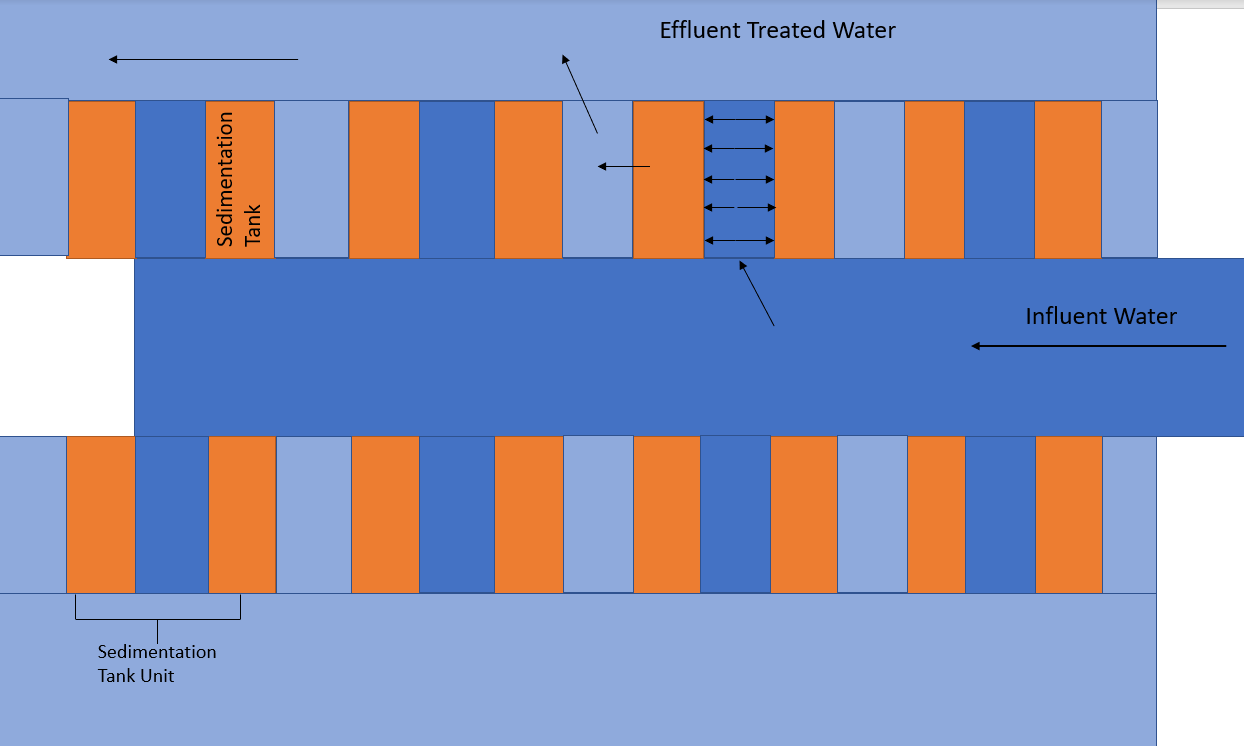

## Plate Settlers

The length of plate settlers is important to determine because if they are too short, insufficient amounts of particles will have time to settle and be captured, and if they are too long, the plat will not be at maximum efficiency. As shown in the **Physics** section above, $$L = \frac{S\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}-1\right) + T\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}\right)}{sin\alpha cos\alpha}$$ AguaClara plate settlers have a capture velocity of 0.12 mm/s, which is the value we will use as the basis of our design. S, or spacing between plates can be calculated using the equation

$$S_{min} \approx \frac{3 D_0}{sin^2\alpha} \frac{\bar v_{z_{Plate}}}{v_c}  \left( \frac{18 v_c \Phi \nu }{D_0^2g} \frac{ \rho_{H_2O}}{ \rho_{floc_0} - \rho_{H_2O}} \right) ^{\frac{1}{ D_{fractal} - 1}}$$

from the [AguaClara textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Derivations.html?highlight=slide#equation-sedimentation-sed-derivations-46).

Because the properties of the flocs entering the sedimetation system are still unknown, we will use clay are a filler value.